In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
x=np.linspace(-5.0 , 5.0 , 100)
y=np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [71]:
x1=np.linspace(-5.0 , 5.0 , 100)
y1=np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1 ,-x1])

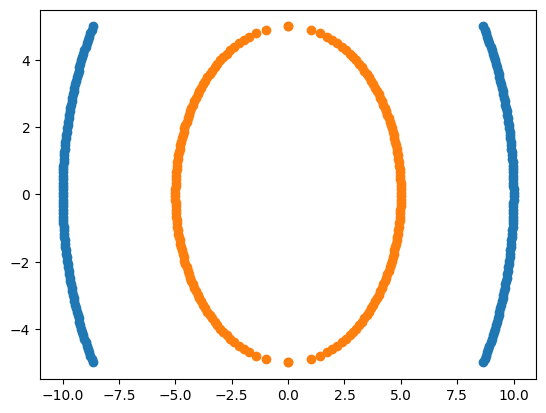

In [72]:
plt.scatter(y , x)
plt.scatter(y1 , x1)

In [73]:
arr=np.vstack([y,x])
arr.ndim

2

In [74]:
arr1=np.array([[1,2,3],
         [4,5,6]])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
arr1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### Poly

In [76]:
df1=pd.DataFrame(np.vstack([y,x]).T , columns=['X1' , 'X2'])
df1['Y']=0

In [77]:
df2=pd.DataFrame(np.vstack([y1 , x1]).T , columns=['X1' , 'X2'])
df2['Y']=1

In [78]:
df1

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [79]:
df2

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [80]:
df=df1.append(df2)

C:\Users\Mohit\AppData\Local\Temp\ipykernel_12580\2456558213.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [81]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [82]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [83]:
X=df[['X1_Square' , 'X2_Square' , 'X1*X2']]
y=df['Y']

In [84]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

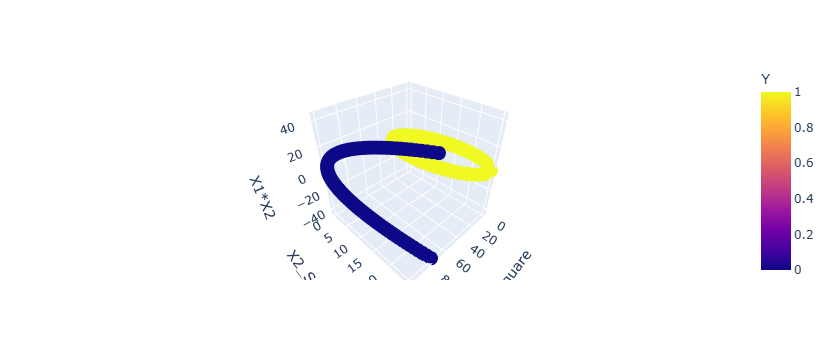

In [86]:
import plotly.express as px

fig=px.scatter_3d(df, x='X1_Square' , y='X2_Square' , z='X1*X2' , color='Y')

fig.show()

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel='linear')
classifier.fit(X_train , y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test , y_pred)

1.0

### RBF

In [95]:
X=df.iloc[: , 0:2]

In [96]:
y=df.iloc[: , 2]

In [98]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.25 , random_state=0)

In [99]:
classifier=SVC(kernel='rbf')
classifier.fit(X_train , y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test , y_pred)

1.0

### Sigmoid

In [100]:
classifier=SVC(kernel='sigmoid')
classifier.fit(X_train , y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test , y_pred)

0.51